# Exercise 1: Data Exploration and Preprocessing
### 1. **Load and Explore the Data:**
* Load the Breast Cancer Diagnosis Dataset into a pandas DataFrame.
* Display the first 10 rows and check for missing values.
* Explore the distribution of features using descriptive statistics (mean, std, min, max, etc.).

Task:
* Summarize the dataset: How many instances and features are there? Are there any
missing values?
* Which features have the highest variance and might be the most important for
classification?

### 2. **Preprocessing:**
* Drop irrelevant columns (e.g., id and unnamed columns).
* Convert the target variable diagnosis (M = Malignant, B = Benign) into numerical format.
* Normalize or standardize the features to ensure they're on the same scale (optional).
Task:
* After preprocessing, split the dataset into 80% training and 20% testing data using
train_test_split.

In [56]:
import pandas as pd


df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')


print(df.head(10))


print(df.isnull().sum())


print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

## Task: Summarize the Dataset:

In [57]:
print (f'Instances: {df.shape[0]}, Features: {df.shape[1]}')

print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

## 3. Preprocessing:

In [58]:
from sklearn.preprocessing import StandardScaler

df = df.drop (columns=['id', 'Unnamed: 32'], errors='ignore')

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

## 4. Train-Test Split:

In [59]:
from os import X_OK
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model
## 1. Implement a KNN Classifier:
* Use the KNeighborsClassifier from scikit-learn.
* Train the KNN classifier using the training data (use n_neighbors=5 by default).
* Predict the tumor diagnosis on the test data.
Task:
* Calculate the accuracy of the KNN model.
* Present the confusion matrix for the predictions.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


## 2. Experiment with Different n_neighbors:


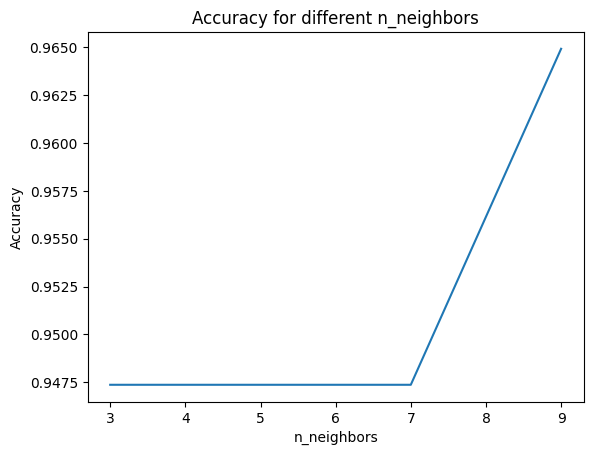

In [62]:
import matplotlib.pyplot as plt

neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

# Exercise 3: Implementing Logistic Regression
1. Implement a Logistic Regression Classifier:
* Use the LogisticRegression from scikit-learn.
* Train the model using the training data and predict the test data labels.

Task:
* Calculate the accuracy of the Logistic Regression model.
* Present the confusion matrix and classification report (precision, recall, F1-score).

2. Comparison of KNN and Logistic Regression:
* Compare the performance (accuracy, precision, recall) of both models on the same
dataset.

Task:
* Which model performs better in terms of accuracy and F1-score?
* Discuss which model you think is more appropriate for this classification problem and
why.

## 1. Train Logistic Regression:

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 2. Comparison of KNN and Logistic Regression:
Compare their accuracy, precision, and F1-score based on the classification report

# Exercise 4: Hyperparameter Tuning and Cross-Validation

## 1. GridSearchCV for KNN:

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


## 2. Cross-Validation for Logistic Regression:


In [66]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


# Exercise 5: Decision Boundary Visualization

## 1. Use PCA for Dimensionality Reduction:

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

Task:

Plot the Decision Boundary:

* You can use matplotlib or similar libraries to plot the decision boundaries.
